In [2]:
# import needed packages
import numpy as np
from model_code import utilities_visuals as ut
from model_code import utilities_simulation as us

from model_code import ArgModel as normal_am
from model_code import reducedArgModel as reduced_am

In [3]:
M = 4
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 500
    , "no_of_iterations": 10000
    # strength of biased processing
    ,"ß": 4.0
    # Number of implicitly modelled arguments
    ,"M": M
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=M, normalised=True)
    }


In [4]:
measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    , "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    , "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}
# simulates a model run and saves the returned data for later use
measures_reduced = reduced_am.simulate_agent_interaction(model_parameters, measures)

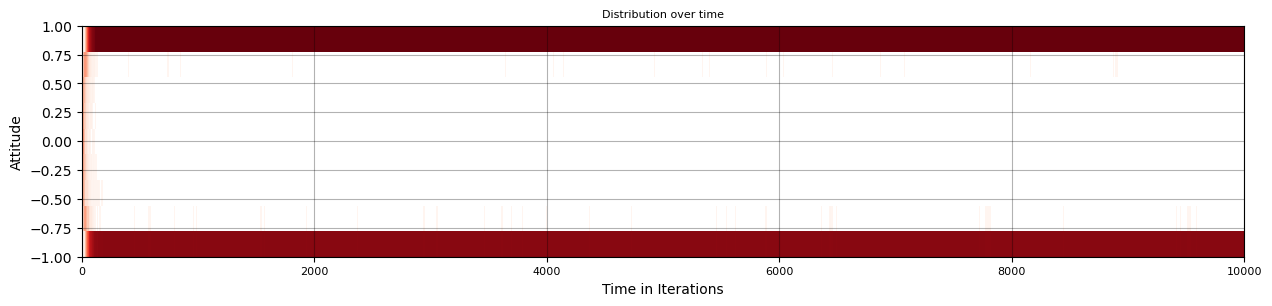

In [4]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(measures_reduced["attitude_of_all_agents"], 9, model_parameters["M"])

In [5]:
measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    #, "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    #, "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
    #takes too long for 1000 agents
    #, "correlation_of_evaluations": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    }

measures_normal = normal_am.simulate_agent_interaction(model_parameters, measures)

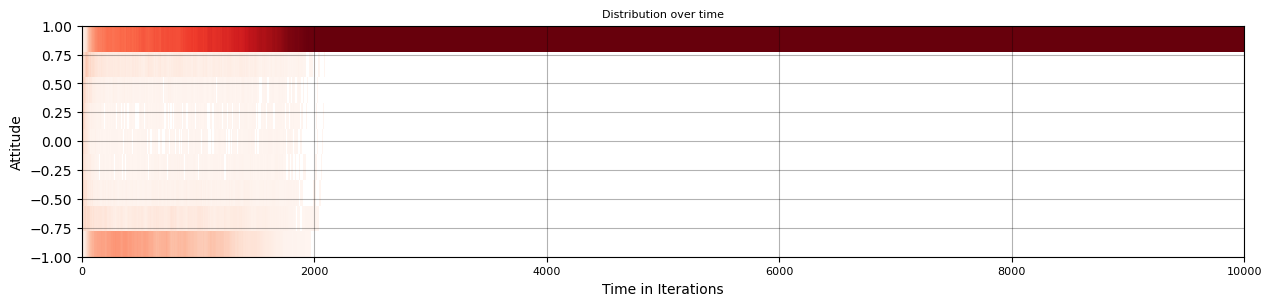

In [6]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(measures_normal["attitude_of_all_agents"], 9, model_parameters["C"])